In [5]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
from RiskReturn import *
from PyPortfolio import *
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

start = dt.datetime(1980,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['SPY', 'GLD'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()

[*********************100%***********************]  2 of 2 completed


In [7]:
my_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [8]:

my_object.get_conditional_var()

,Historic Conditional VaR,Guassian Conditional VaR
0,"GLD 0.050871 SPY 0.044356 Name: 0.1, dty...",GLD 0.055866 SPY 0.046041 dtype: float64


<AxesSubplot:xlabel='Date'>

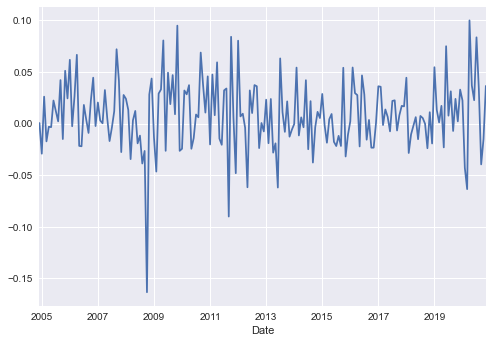

In [11]:
w = np.array([0.5,0.5])
w.shape
returns_monthly.shape
pr = w @ returns_monthly.T

pr.plot()

In [12]:
def portfolio_volatility(return_series, weights):
    pvar = weights.transpose() @ return_series.cov @ weights
    return math.sqrt(pvar)

In [13]:
foo = PyPortfolio(return_series=returns_monthly, periodicity='M')
foo.portfolio_volatility * 12**0.5

0.11694817807130296

In [17]:
my_object.get_drawdown()['SPY'].plot(title= 'SPY')

,GLD,SPY
Date,,
2004-12-31,-0.029255,0.030121
2005-01-31,-0.036073,-0.022421
2005-02-28,0.031028,0.020904
2005-03-31,-0.016311,-0.018293
2005-04-30,0.012377,-0.018735
...,...,...
2020-07-31,0.107905,0.058892
2020-08-31,-0.003236,0.069797
2020-09-30,-0.041714,-0.037444


<AxesSubplot:title={'center':'Equal weight portfolio of SPY and GLD'}, xlabel='Date'>

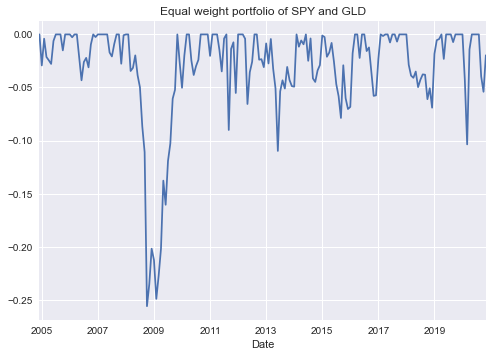

In [16]:
foo.portfolio_return.get_drawdown().plot(title='Equal weight portfolio of SPY and GLD')

<AxesSubplot:xlabel='Date'>

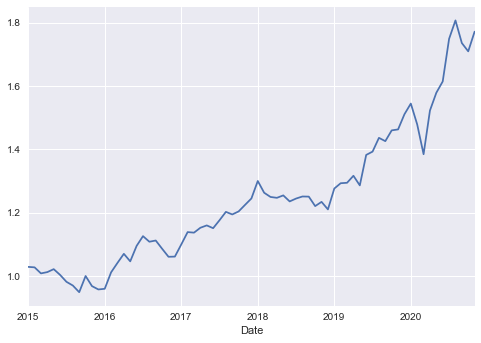

In [15]:
bar = foo.portfolio_return.get_return_series()['2015':]
dollar_index(bar).plot()